In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
#### Juan Jose Bustamante Guiral
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [57]:
def f(x):
    return x**2 -4

In [58]:
def regula_falsi(f, a, b, tol=1e-3, max_iter=100):
    '''
    f: funcion
    a: limite inferior
    b: limite superior
    tol: tolerancia
    max_iter: numero maximo de iteraciones
    '''
    if f(a) * f(b) >= 0:
        raise ValueError('f(a) y f(b) deben de tener signos opuestos')
    for i in range(max_iter):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a)) #Representa la interseccion (a,f(a)) y (b,f(b)) con el eje x
        if abs(f(c)) < tol:
            return c
        elif f(c) * f(a) > 0:
            a = c
        elif f(c) * f(b) > 0:
            b = c
    if abs(f(c)) < tol:
        raise ValueError('No se pudo encontrar una raiz en el intervalo dado')

In [59]:
regula_falsi(f, 1, 3)

1.9999146684870721

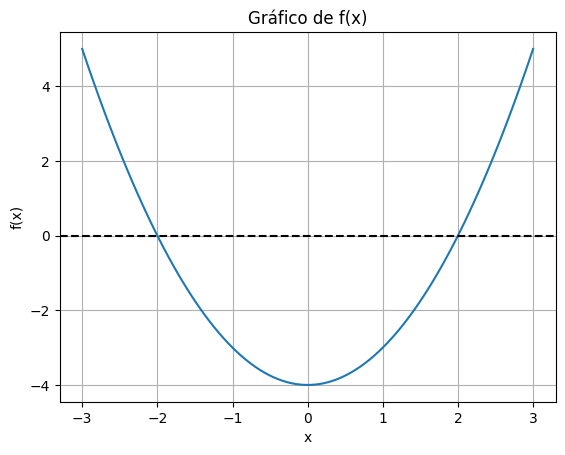

In [60]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x))
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico de f(x)')
plt.grid()
plt.show()

# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

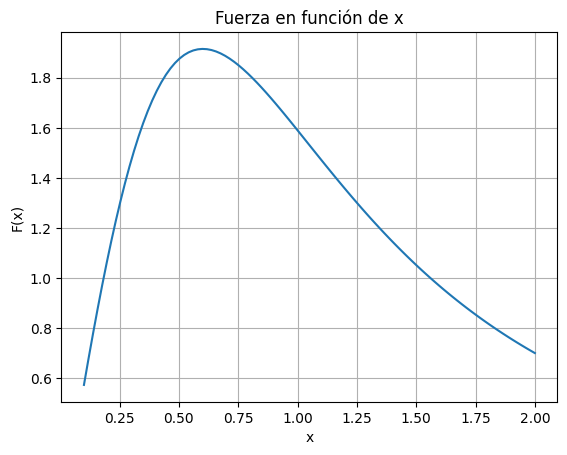

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar, bisect

# Constantes
epsilon_0 = 8.854e-12
q = Q = 2e-5

def fuerza(x, a):
    '''
    x: distancia horizontal
    a: radio del anillo
    '''
    return (1 / (4 * np.pi * epsilon_0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))

x = np.linspace(0.1, 2.0, 100)
a = 0.85
F = fuerza(x, a)
plt.plot(x, F)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Fuerza en función de x')
plt.grid()
plt.show()

In [62]:
# Constantes
epsilon_0 = 8.854e-12
q = Q = 2e-5
a = 0.85
F_obj = 1.25  # N

def F(x):
    '''
    x: distancia horizontal
    '''
    return (1 / (4 * np.pi * epsilon_0)) * (q * Q * x) / ((x**2 + a**2)**(1.5))

def dFdx(x):
    '''
    x: distancia horizontal
    '''
    num = q * Q * ((x**2 + a**2)**(1.5) - 3 * x**2 * (x**2 + a**2)**0.5)
    den = (4 * np.pi * epsilon_0 * (x**2 + a**2)**3)
    return num / den

def f_obj(x):
    '''
    f(x) - F_obj = 0
    '''
    return F(x) - F_obj

x_sol = newton(f_obj, x0=1.0, fprime=dFdx)

print(f"x tal que F(x) = 1.25 N es aproximadamente: {x_sol:.4f} m")


x tal que F(x) = 1.25 N es aproximadamente: 1.2974 m


In [66]:
secante = root_scalar(f_obj, method='secant', x0=0.5, x1=1.5)
print(f"con el metodo de la Secante x tal que F(x) = 1.25 N es aproximadamente: {secante.root:.4f} m")


con el metodo de la Secante x tal que F(x) = 1.25 N es aproximadamente: 1.2974 m


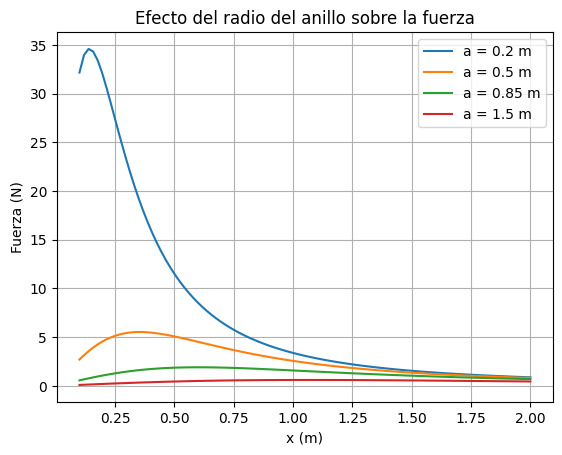

In [67]:
a_vals = [0.2, 0.5, 0.85, 1.5]
for a in a_vals:
    plt.plot(x, fuerza(x, a), label=f"a = {a} m")

plt.xlabel("x (m)")
plt.ylabel("Fuerza (N)")
plt.title("Efecto del radio del anillo sobre la fuerza")
plt.legend()
plt.grid()
plt.show()


# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



In [68]:
def velocidad_ascendente(t, m0, u, q, g=9.81):
    return u * np.log(m0 / (m0 - q * t)) - g * t

<ipython-input-68-4a548a798ac7>:2: RuntimeWarning: invalid value encountered in log
  return u * np.log(m0 / (m0 - q * t)) - g * t


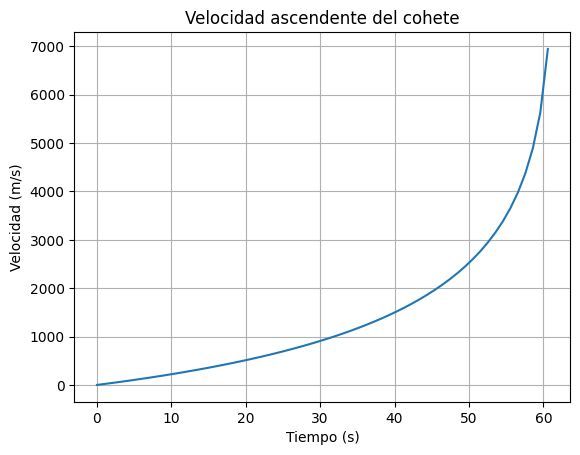

In [75]:
t = np.linspace(0, 100, 100)
m0 = 1.6e5
u = 1800
q = 2600
v = velocidad_ascendente(t, m0, u, q)
plt.plot(t, v)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad ascendente del cohete')
plt.grid()
plt.show()

In [78]:
def f_newton(t):
    return velocidad_ascendente(t, m0, u, q) - 750

def df_newton(t):
    g = 9.81
    return (u * q) / (m0 - q * t) - g

t_newton = newton(f_newton, x0=20, fprime=df_newton)
t_biseccion = bisect(f_newton, 1, 60)
t_regula_falsi = regula_falsi(f_newton, 1, 60)

print(f"[Newton-Raphson] Tiempo para v = 750 m/s: {t_newton:.4f} s")
print(f"[Biseccion] Tiempo para v = 750 m/s: {t_biseccion:.4f} s")
print(f"[Regula Falsi] Tiempo para v = 750 m/s: {t_regula_falsi:.4f} s")

[Newton-Raphson] Tiempo para v = 750 m/s: 26.4078 s
[Biseccion] Tiempo para v = 750 m/s: 26.4078 s
[Regula Falsi] Tiempo para v = 750 m/s: 26.4078 s


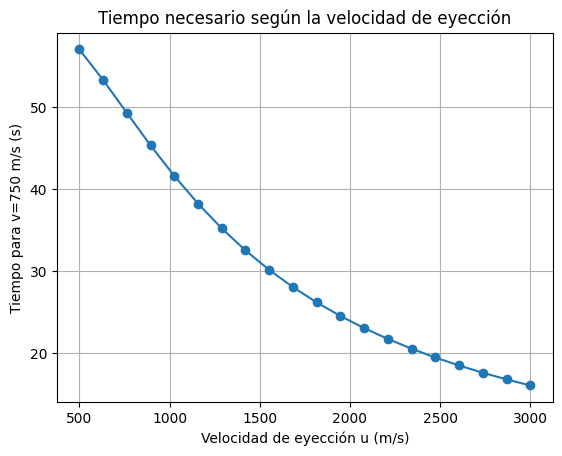

In [82]:
u_vals = np.linspace(500, 3000, 20)
tiempos = []
g = 9.81
for u_i in u_vals:
    def v_u(t): return u_i * np.log(m0 / (m0 - q * t)) - g * t
    def f_u(t): return v_u(t) - 750
    sol = bisect(f_u, 1, 60)
    tiempos.append(sol)

# Graficar tiempo vs u
plt.plot(u_vals, tiempos, 'o-')
plt.xlabel("Velocidad de eyección u (m/s)")
plt.ylabel("Tiempo para v=750 m/s (s)")
plt.title("Tiempo necesario según la velocidad de eyección")
plt.grid()
plt.show()
